# Hello , This is Anjana V Acharya

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer

### There are a total of 3 datasets used , the following are exploratory analysis on the 3 datasets 

#### 1. The data set used as a training dataset for simple text based scam detection

In [2]:
# Loading the csv file (open source)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
print(df.tail())

     label                                            message
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name


Adding the synthetic examples for training since the dataset is quite outdated(until we find a better dataset)

     label                                            message
5630   ham  Mobikwik cashback of ₹30 has been credited to ...
5631   ham  Blinkit delivery partner is picking up your it...
5632   ham  Google Pay: Your transaction of ₹599 to Myntra...
5633   ham  Airtel: Your plan is valid until next month. D...
5634   ham  Your SBI debit card has been delivered. Please...


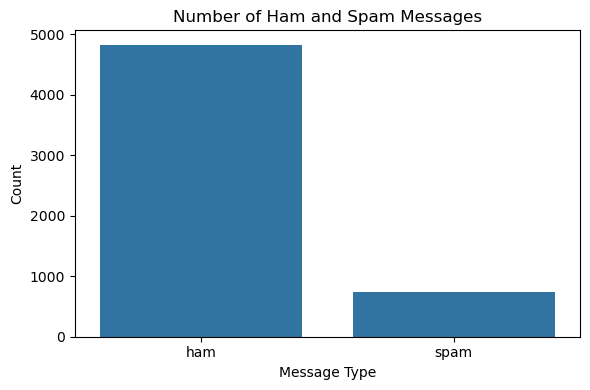

In [4]:
synthetic_spam = [
    "Hurry up! Spin the wheel and win amazing prizes today!",
    "Don't miss out, click this link below to claim your exclusive offer.",
    "Congratulations! Claim your prize now by visiting our website.",
    "Spin the wheel for a chance to win big rewards instantly.",
    "Click this link below to activate your free gift card.",
    "Limited time offer: claim your prize before it expires!",
    "Your Paytm KYC is pending. Visit paytm-help.xyz to update immediately or your wallet will be blocked.",
    "Dear SBI customer, your YONO access is suspended. Reactivate now at sbi-verify.info.",
    "Your Flipkart order has been held. Verify payment details at flipkart-secure.in.",
    "Claim your ICICI refund now at icici-alerts.co before it expires.",
    "Congratulations! You’ve won ₹10,000 Amazon Pay balance. Click amazon-india-reward.co to claim.",
    "Your HDFC NetBanking is temporarily disabled. Restore access at hdfc-login.help.",
    "Dear customer, you've received cashback from PhonePe. Claim it here: phonepe-promos.co.",
    "URGENT: Complete your KYC at google-pay.in-gov.org or services will be paused.",
    "Netflix account will be suspended. Update billing info at netflix-india-check.com.",
    "Verify your IRCTC account to avoid suspension. Visit irctc-securemail.in now.",
    "Zomato order refund of ₹145 is pending. Confirm your bank details here: zomato-service.co.",
    "Your LIC policy is expiring. Renew now at lic-india-secure.org.",
    "New cashback reward from Swiggy! Click swiggyoffers.today to activate.",
    "You've won a Flipkart voucher worth ₹5,000! Visit luckyflipkart.win to claim.",
    "Exclusive Myntra promo! Get ₹1,000 free. Redeem at myntra-gift.xyz now.",
    "Your Uber account has a pending verification. Go to uberindia-check.net.",
    "EPFO alert: Your UAN is deactivated. Update now at epfo-portal.live.",
    "BigBasket gift card awaits! Collect it now at bigbasket-prizes.co.",
    "Get your free Amazon Fire Stick now. Just pay ₹2 shipping at amznindia.click.",
    "Your PAN is under review. Verify at incometax-kyc.co.in to avoid penalties.",
    "Disney+ Hotstar subscription renewal failed. Update payment at hotstar-secure.org.",
    "Airtel cashback alert! Grab ₹100 now at airtel-verification.in.",
    "Mobikwik KYC expired! Update immediately at mobikwik-verify.net.",
    "Your Ola ride history is locked. Unlock it now at ola-securitycheck.com.",
    "Congratulations! You won ₹25,000 in the Dream11 IPL draw. Visit dream11-rewards.win to claim.",
    "Claim your bonus on WinZO now! Tap winzo-bonus.live before midnight."
]

synthetic_ham = [
    "I was thinking we could spin the wheel at the party for fun.",
    "Please click this link below to view the meeting agenda.",
    "Remember to claim your prize for participating in the office raffle.",
    "Let's schedule a meeting and discuss the project details.",
    "Can you spin the wheel for the game tonight?",
    "Here is the link below that contains the report you asked for.",
    "Your Paytm wallet balance is low. Please add funds to continue using services.",
    "ICICI sent a transaction alert for your recent payment. Kindly check your inbox.",
    "Flipkart delivery scheduled for today. Track your order via the Flipkart app.",
    "Reminder: Your LIC premium is due next week. Please pay via official website.",
    "Your Swiggy order is on the way. Estimated delivery in 30 minutes.",
    "Your Ola driver is arriving soon. Please be at the pickup point.",
    "Netflix: Enjoy your favorite shows. Your subscription is active till June 30.",
    "Zomato feedback request: How was your recent order?",
    "Amazon: Your refund of ₹499 has been initiated. No action required.",
    "PhonePe: Payment of ₹250 to Electric Co. was successful.",
    "Uber: You’ve earned a ₹100 ride credit valid for this week.",
    "Jio recharge of ₹239 is successful. Enjoy unlimited calls and 1.5GB/day.",
    "Ajio return request has been received. Pickup scheduled for tomorrow.",
    "HDFC: Your credit card statement is ready to view in NetBanking.",
    "Hotstar: New episode of your favorite series is now streaming!",
    "SBI: Your OTP for internet banking login is 457321. Do not share it.",
    "IRCTC: Train 12345 is expected to arrive at 6:45 PM. Check platform info in app.",
    "Income Tax India: Reminder to file your ITR before July 31.",
    "BigBasket: Your order #BB1234567 has been packed and ready for dispatch.",
    "BookMyShow: Your tickets for 'Avengers' have been emailed to you.",
    "Mobikwik cashback of ₹30 has been credited to your wallet.",
    "Blinkit delivery partner is picking up your items. Track live in app.",
    "Google Pay: Your transaction of ₹599 to Myntra was successful.",
    "Airtel: Your plan is valid until next month. Data left: 3.2 GB.",
    "Your SBI debit card has been delivered. Please activate via YONO app."
]

df_synthetic_spam = pd.DataFrame({
    'message': synthetic_spam,
    'label': ['spam'] * len(synthetic_spam)
})

df_synthetic_ham = pd.DataFrame({
    'message': synthetic_ham,
    'label': ['ham'] * len(synthetic_ham)
})

# Append to your original dataset
df_augmented = pd.concat([df, df_synthetic_spam, df_synthetic_ham], ignore_index=True)
print(df_augmented.tail())
# successfully augmented

# To distinguish between spam and ham messages one main difference is the choice of words.. To prove that
label_counts = df['label'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)

plt.title('Number of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### This plot is to show the most frequent words in spam and ham codes

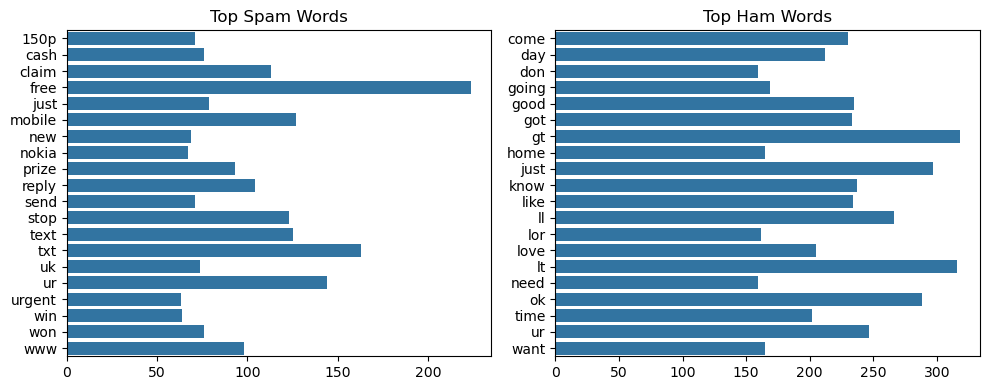

In [7]:

spam_messages = df[df['label'] == 'spam']['message']
ham_messages = df[df['label'] == 'ham']['message']

# Create separate vectorizers
vectorizer_spam = CountVectorizer(stop_words='english', max_features=20)
vectorizer_ham = CountVectorizer(stop_words='english', max_features=20)

# Fit separately
spam_words = vectorizer_spam.fit_transform(spam_messages)
ham_words = vectorizer_ham.fit_transform(ham_messages)

# Sum word counts
spam_word_sum = spam_words.sum(axis=0).A1
ham_word_sum = ham_words.sum(axis=0).A1

# Get vocab
spam_vocab = vectorizer_spam.get_feature_names_out()
ham_vocab = vectorizer_ham.get_feature_names_out()

# Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=spam_word_sum, y=spam_vocab)
plt.title("Top Spam Words")

plt.subplot(1, 2, 2)
sns.barplot(x=ham_word_sum, y=ham_vocab)
plt.title("Top Ham Words")

plt.tight_layout()
plt.show()

#### The length of spam and ham is being compared but please note that there is no direct relationship..yet a useful feature

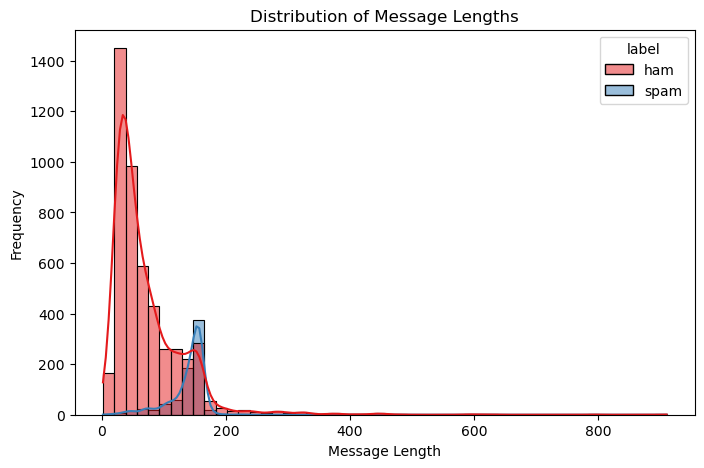

In [8]:
df['length'] = df['message'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='length', hue='label', bins=50, kde=True, palette='Set1')
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()
# Inference:
# Ham messages tend to be much shorter in length, with most under 100 characters.
# Spam messages are generally longer, often clustering between 120–160 characters or more.
# This indicates that message length can be a useful feature for distinguishing spam from ham.


### Further for URL based scam detection , we have 2 datasets being used 
1. A custom made csv file containing all the well known brands that scammers prefer to impersonate
2. An open source kaggle dataset for implementing traditional spam detection
   #### This approach improves accuracy and speed by using a fixed list of known brand domains, but I know it’s not very efficient or scalable. So, I’m looking to create a CSV that updates dynamically with new brands—if anyone wants to help contribute or suggest ideas, that’d be appreciated!

#### 2. phishing_targets.csv - A manually curated list of popular Indian fintech, gaming, and e-commerce brands, along with their official domains.
Purpose: To detect impersonation scams by comparing message URLs against this verified brand list.

In [10]:
df2=pd.read_csv("phishing_targets.csv")
df2.head()

,label,url
0,Paytm,paytm.com
1,PhonePe,phonepe.com
2,Razorpay,razorpay.com
3,Pine Labs,pinelabs.com
4,PolicyBazaar,policybazaar.com


In [12]:
# Number of companies
print(f"Total brands: {len(df2)}")

Total brands: 108


In [13]:
df2.tail()

,label,url
103,Dunzo,dunzo.com
104,Bharat BillPay,bharatbillpay.com
105,IRDAI,irdai.gov.in
106,EPFO,epfindia.gov.in
107,Income Tax India,incometax.gov.in


#### 3. malicious_phish.csv - A labeled dataset of URLs classified into categories such as benign, malware, phishing, and defacement.
Purpose: To train and evaluate the URL classification model by distinguishing between safe and various types of malicious URLs, helping the scam detector identify harmful links more accurately.

##  Just a heads-up: This list includes some shady links like phishing and malware sites. So, definitely don’t click on them 

In [15]:
df3=pd.read_csv("malicious_phish.csv")
df3.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [19]:
# Length of the csv file
print(f"Total number of urls {len(df3)}")

Total number of urls 651191


A graph of distribution of sites in this file

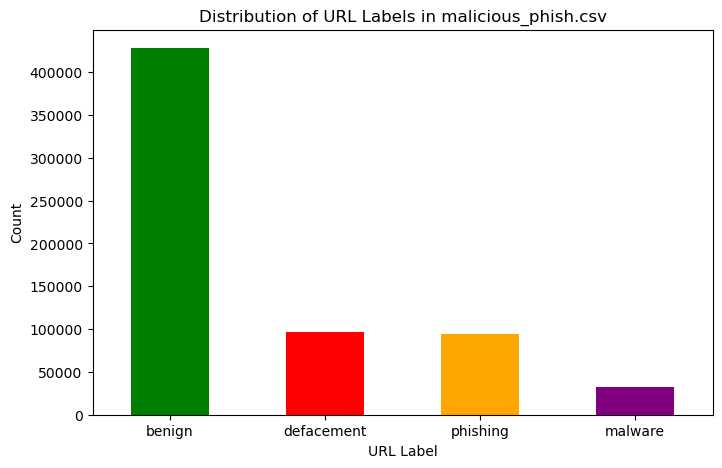

In [18]:

# Count URLs per label
label_counts = df3['type'].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
label_counts.plot(kind='bar', color=['green', 'red', 'orange', 'purple'])
plt.title('Distribution of URL Labels in malicious_phish.csv')
plt.xlabel('URL Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

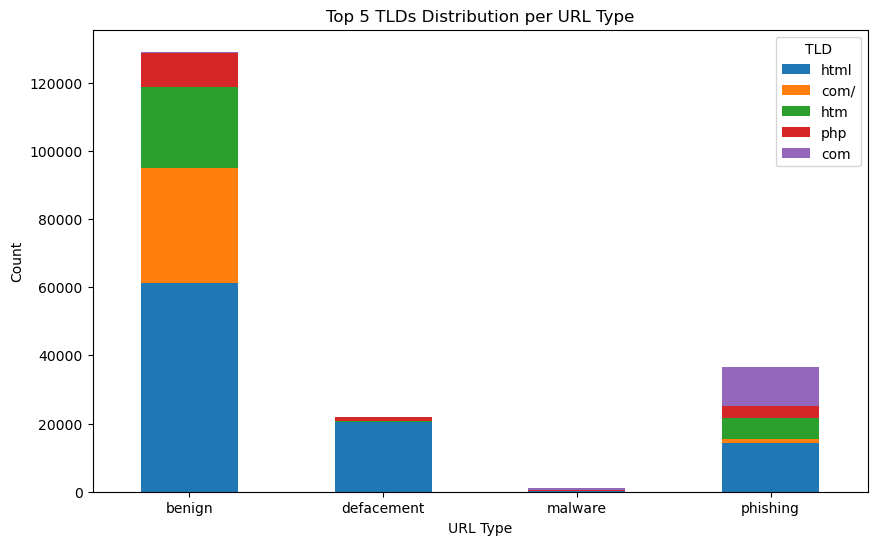

In [21]:
# Top-Level Domain (TLD) Distribution by URL Type
# This shows which domain endings (like .com, .org, .xyz) are most common for each type of URL (benign, phishing, malware, etc.).
# Helps spot patterns in how scammy URLs are structured.
# Extract TLD from URLs
df3['tld'] = df3['url'].apply(lambda x: x.split('.')[-1].lower())

# Count TLDs for each type
tld_type_counts = df3.groupby(['type', 'tld']).size().unstack(fill_value=0)

# Show top 5 TLDs overall
top_tlds = tld_type_counts.sum(axis=0).sort_values(ascending=False).head(5).index
top_tld_type_counts = tld_type_counts[top_tlds]

# Plot stacked bar chart
top_tld_type_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Top 5 TLDs Distribution per URL Type')
plt.xlabel('URL Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='TLD')
plt.show()


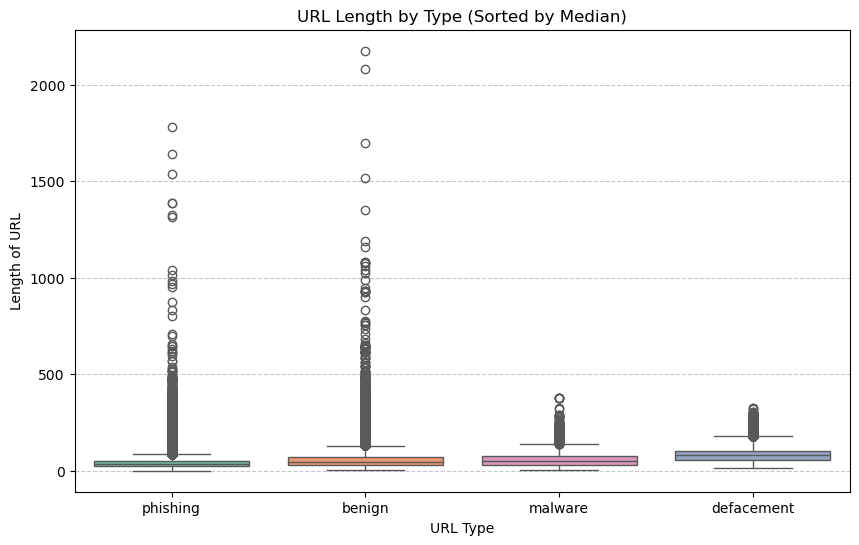

In [24]:
# URL Length Distribution by Type
# Helps identify if malicious URLs tend to be longer, shorter, or unusually structured.
df3['url_length'] = df3['url'].apply(len)

# Calculate median lengths to sort the types
medians = df3.groupby('type')['url_length'].median().sort_values()
ordered_types = medians.index

plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='url_length', data=df3, order=ordered_types,hue='type', palette='Set2')
plt.title('URL Length by Type (Sorted by Median)')
plt.xlabel('URL Type')
plt.ylabel('Length of URL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()